In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


***unzipping the data ***



In [77]:
if not os.path.exists("/kaggle/working/train"):
    !unzip -q /kaggle/input/dogs-vs-cats/train.zip


In [78]:
train_path = '/kaggle/working/train'
len(os.listdir(train_path))

25000

**visualization**

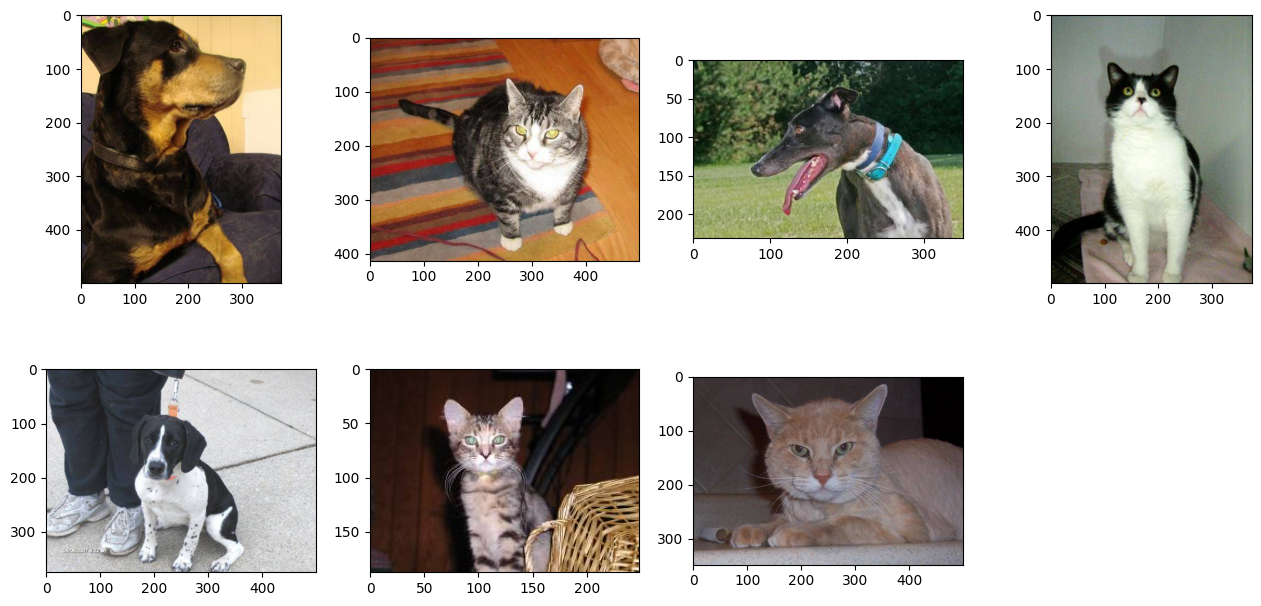

In [127]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
import random
images=os.listdir(train_path)
plt.figure(figsize=(16,16))
for i in range(7): 
    img = random.choice([x for x in images])
    fig = plt.subplot(4,4,i+1)
    img = mpimg.imread(os.path.join(train_path, img)) 
    fig.imshow(img)
    
    
    

**oraganisation of the directories : cats / dogs**


In [80]:
# store our smaller dataset
base_dir ='/kaggle/working//cats_and_dogs_small'
try:
  os.mkdir(base_dir)
except:
  pass

In [81]:
train_dir = os.path.join(base_dir, 'train')
try:
  os.mkdir(train_dir)
except:
  pass  
validation_dir = os.path.join(base_dir, 'validation')
try:
  os.mkdir(validation_dir)
except:
  pass   
test_dir = os.path.join(base_dir, 'test')
try:
  os.mkdir(test_dir)
except:
  pass   

In [82]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
try:
  os.mkdir(train_cats_dir)
except:
  pass   

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
try:
  os.mkdir(train_dogs_dir)
except:
  pass   

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
try:
  os.mkdir(validation_cats_dir)
except:
  pass 

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
try:
  os.mkdir(validation_dogs_dir)
except:
  pass   

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
try:
  os.mkdir(test_cats_dir)
except:
  pass   

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
try:
  os.mkdir(test_dogs_dir)
except:
  pass   

In [83]:
images[:20]

['dog.5817.jpg',
 'dog.9102.jpg',
 'cat.2699.jpg',
 'cat.9300.jpg',
 'cat.6215.jpg',
 'dog.1307.jpg',
 'dog.5253.jpg',
 'cat.11299.jpg',
 'dog.3938.jpg',
 'dog.6222.jpg',
 'dog.6181.jpg',
 'cat.3003.jpg',
 'cat.11759.jpg',
 'cat.11157.jpg',
 'cat.11654.jpg',
 'dog.9007.jpg',
 'dog.224.jpg',
 'dog.8923.jpg',
 'dog.3626.jpg',
 'cat.2822.jpg']

In [84]:
import shutil
#store only 1000 samples for each category for training data 

fnames_dog=['dog.{}.jpg'.format(i) for i in range(1000) ]
fnames_cat=['cat.{}.jpg'.format(i) for i in range(1000) ]
for fname in fnames_dog :
    src = os.path.join(train_path, fname)
    path=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,path)
for fname in fnames_cat:
    src = os.path.join(train_path, fname)
    path=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,path)
    

    

In [85]:
#store only 500 samples for each category for validation data 
fnames_cat = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
fnames_dog = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames_dog :
    src = os.path.join(train_path, fname)
    path=os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,path)
for fname in fnames_cat:
    src = os.path.join(train_path, fname)
    path=os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,path)
    


In [86]:
#store only 500 samples for each category for vtest data 
fnames_cat = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
fnames_dog = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames_dog :
    src = os.path.join(train_path, fname)
    path=os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,path)
for fname in fnames_cat:
    src = os.path.join(train_path, fname)
    path=os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,path)

In [87]:
#verification
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total training cat images:', len(os.listdir(validation_cats_dir)))
print('total training cat images:', len(os.listdir(validation_dogs_dir)))
print('total training cat images:', len(os.listdir(test_cats_dir)))
print('total training cat images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total training cat images: 500
total training cat images: 500
total training cat images: 500
total training cat images: 500


**Building our network**


In [88]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [89]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [90]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

**Data preprocessing**

In [91]:
#python generator 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [92]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


**fitting the data**

In [93]:

history = model.fit(
      train_generator,
    #cuz there are 2000 sapmples=100*20(batch-size(20images))
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
 26/100 [======>.......................] - ETA: 42s - loss: 0.7069 - acc: 0.5038

KeyboardInterrupt: 

In [ ]:
#saving the model
import joblib
joblib.dump(model, 'model.pkl')


In [94]:
# Loading the model
model = joblib.load('model.pkl')

In [95]:
preds = model.predict(validation_generator)

50/50 [==============================] - 8s 160ms/step


In [96]:
preds.shape

(1000, 1)

# ****evaluation of the performance ****

**plotting the accuracy/loss of the model over training / validation data**

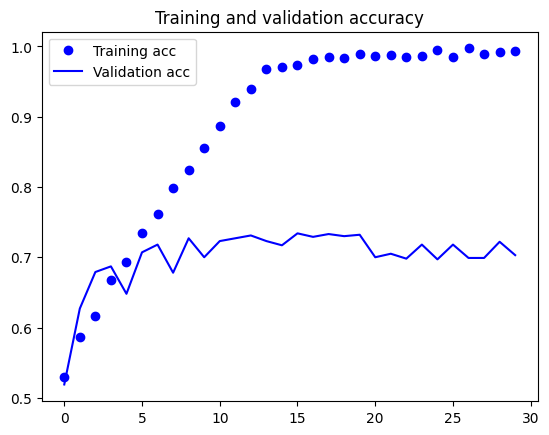

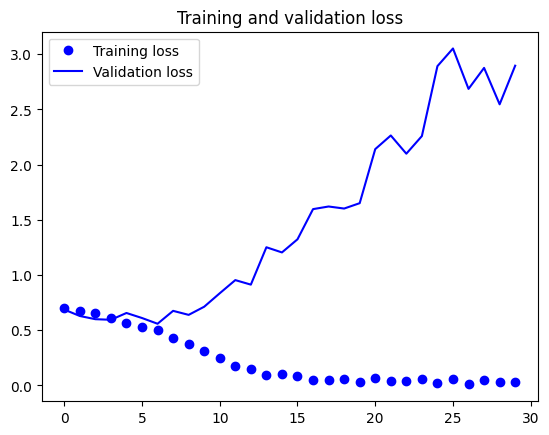

In [97]:
import matplotlib.pyplot as plt
#acc for the training data
acc = history.history['acc']
#acc for the validation data
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#as we see , there is overfitting ( the training acc increases lineraly untill it reaches 100% and the loss reaches 0% (decreasing linearly)


techniques to this problem : 
1. Data augmentation (adding more data from the original)
1. droping out
1. regularization


# data augmentation

In [98]:
datagen = ImageDataGenerator(rescale=1/255,
    #transformers of the image , randomly 
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #filling the missing pixels with the values of the nearst pixels when the zoom  for example                     
      fill_mode='nearest')



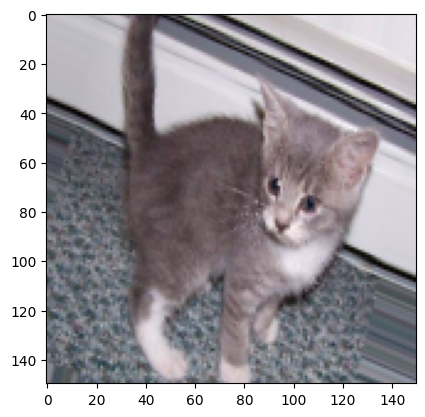

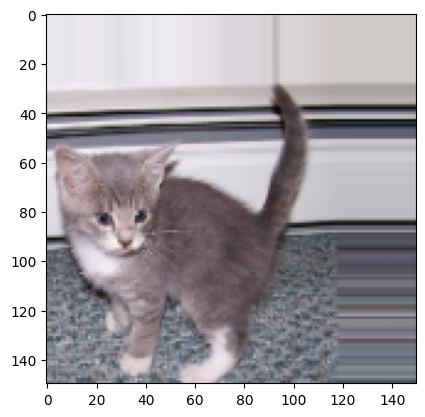

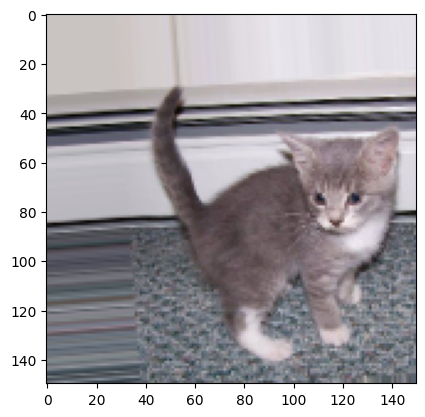

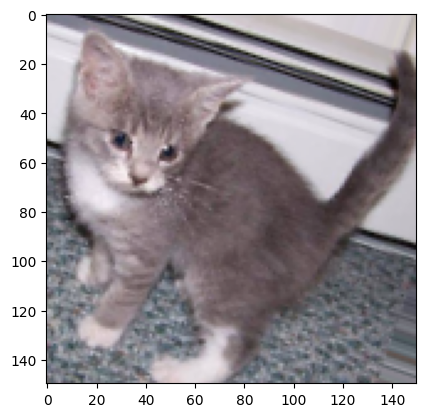

In [99]:
#looking the one augemented image 
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_pth=fnames[0]
img = image.load_img(img_pth, target_size=(150, 150))


#numpy array
x_img = image.img_to_array(img)
x_img = x_img.reshape((1,) + x_img.shape)
i=0

for batch in datagen.flow(x_img, batch_size=1):
    plt.figure(i)
    plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i==4:
        break 
plt.show()

    



**model with data augmentation and dropout**

In [100]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512))#, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 17, 17, 128)     

In [101]:
#using data augementation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')



validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/tmp/ipykernel_32/2170720380.py:30: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 71s 702ms/step - loss: 0.7489 - acc: 0.5065 - val_loss: 0.6907 - val_acc: 0.5050
Epoch 2/30
100/100 [==============================] - 69s 692ms/step - loss: 0.6975 - acc: 0.5165 - val_loss: 0.7672 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 69s 691ms/step - loss: 0.7001 - acc: 0.5365 - val_loss: 0.6570 - val_acc: 0.5990
Epoch 4/30
100/100 [==============================] - 68s 682ms/step - loss: 0.6726 - acc: 0.5935 - val_loss: 0.6449 - val_acc: 0.6410
Epoch 5/30
100/100 [==============================] - 69s 687ms/step - loss: 0.6518 - acc: 0.6140 - val_loss: 0.6403 - val_acc: 0.6210
Epoch 6/30
100/100 [==============================] - 69s 691ms/step - loss: 0.6452 - acc: 0.6205 - val_loss: 0.6335 - val_acc: 0.6070
Epoch 7/30
100/100 [==============================] - 69s 692ms/step - loss: 0.6541 - acc: 0.6280 - val_loss: 0.6023 - val_acc: 0.6790
Epoch 8/30
100/100 [==============================] - 7

#plotting the acc/loss using data augmenation 

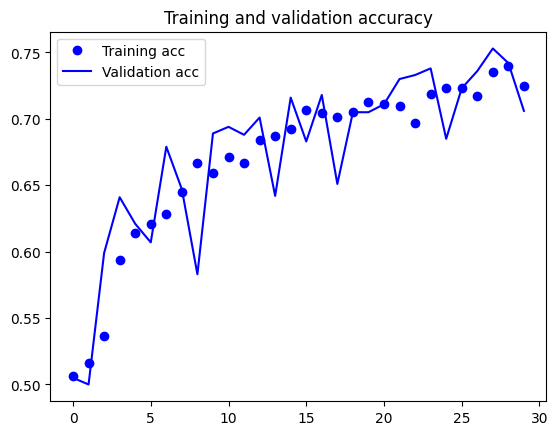

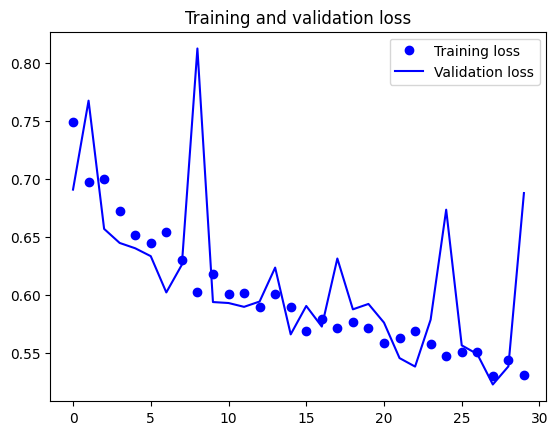

In [102]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [104]:
train_acc = model.evaluate(train_generator)[1]
valid_acc = model.evaluate(validation_generator)[1]
print("Our Base Model Accuracy on Training Data: ", train_acc)
print("Our Base Model Accuracy on Validation Data: ", valid_acc)

50/50 [==============================] - 8s 157ms/step - loss: 0.6878 - acc: 0.7060
Our Base Model Accuracy on Training Data:  0.7074999809265137
Our Base Model Accuracy on Validation Data:  0.7059999704360962


In [105]:
#saving the model
import joblib
joblib.dump(model, 'model2.pkl')



['model2.pkl']

In [107]:
model=joblib.load( 'model2.pkl')

 submission

In [110]:
#loading and proceesing the test data
if not os.path.exists("/kaggle/working/test"):
    !unzip -q /kaggle/input/dogs-vs-cats/test1.zip
test_path = '/kaggle/working/test'
len(os.listdir(train_path))


replace test1/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


NameError: name 'n' is not defined

In [113]:

test_path = '/kaggle/working/test1'
len(os.listdir(test_path))


12500

In [123]:
from tensorflow.keras.preprocessing import image
#scaling data test
test=os.listdir(test_path)
fnames = [os.path.join('/kaggle/working/test1', fname) for fname in test]
submission=[]
for i in range (len(fnames)): 
    
    img = image.load_img(fnames[i], target_size=(150, 150))
    x_img = image.img_to_array(img)
    x_img = x_img.reshape((1,) + x_img.shape)
    x_img=x_img/255
    predictions=model.predict(x_img)
    class_index = np.argmax(predictions)
    submission.append({'id':i ,'label':class_index})



    
    
    
    




1/1 [==============================] - 0s 35ms/step


In [124]:
submission = pd.DataFrame(submission)
submission.to_csv('submission.csv', index=False)


In [125]:
smaple=pd.read_csv('/kaggle/working/submission.csv')

In [126]:
smaple

,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
12495,12495,0
12496,12496,0
12497,12497,0
12498,12498,0
